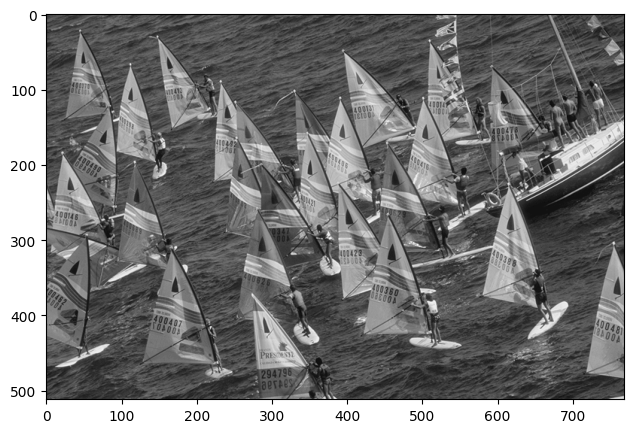

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('sails.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.imshow(image, cmap='gray')
plt.show()

In [2]:
image

array([[ 74,  74,  76, ...,  90,  87,  61],
       [ 72,  76,  85, ...,  76,  66,  74],
       [ 82,  89,  87, ...,  66,  84,  96],
       ...,
       [101,  95,  93, ..., 217, 217, 214],
       [ 98,  93,  76, ..., 209, 206, 207],
       [ 76,  78,  85, ..., 208, 206, 205]], dtype=uint8)

In [3]:
dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

In [4]:
dx

array([[   0.,  458.,  740., ..., -418., -370.,    0.],
       [   0.,  386.,  578., ..., -168.,  -43.,    0.],
       [   0.,  196.,  260., ...,  383.,  494.,    0.],
       ...,
       [   0., -384., -130., ...,  567.,  340.,    0.],
       [   0., -373.,  -23., ...,   61.,  -17.,    0.],
       [   0., -300.,   52., ..., -122., -124.,    0.]])

In [5]:
dy

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ 468.,  396.,  162., ..., -164.,  413.,  740.],
       [ 338.,  220.,  -54., ...,  721., 1232., 1442.],
       ...,
       [-146., -208., -238., ..., 3275., 2702., 2452.],
       [-646., -573., -425., ...,  495.,  205.,   98.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

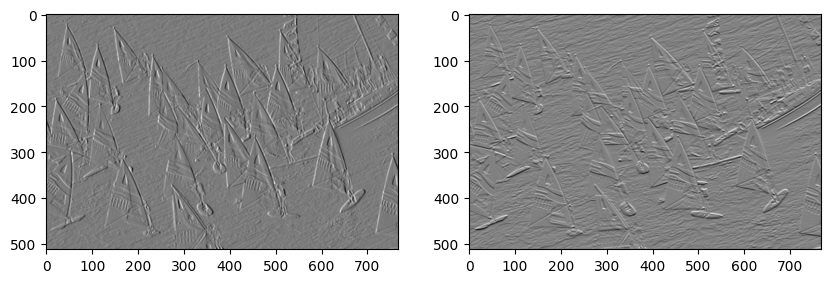

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(dx, cmap='gray')
plt.subplot(122)
plt.imshow(dy, cmap='gray')
plt.show()

## From Scratch

$$
G_{x} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} * I
$$

$$
G_{y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix} * I
$$


In [7]:
image

array([[ 74,  74,  76, ...,  90,  87,  61],
       [ 72,  76,  85, ...,  76,  66,  74],
       [ 82,  89,  87, ...,  66,  84,  96],
       ...,
       [101,  95,  93, ..., 217, 217, 214],
       [ 98,  93,  76, ..., 209, 206, 207],
       [ 76,  78,  85, ..., 208, 206, 205]], dtype=uint8)

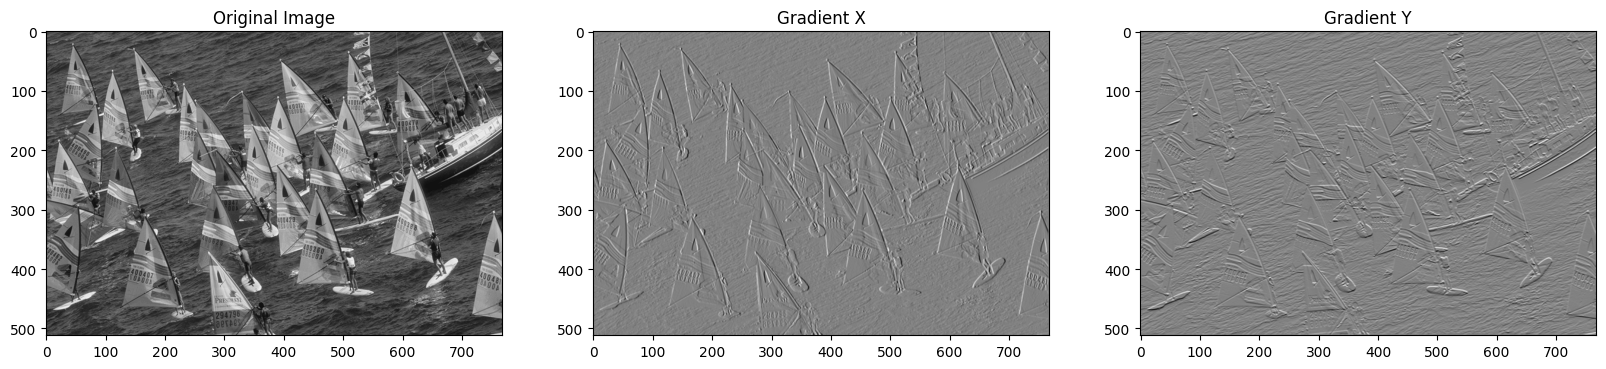

In [8]:
# 定义Sobel滤波器
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# 对图像进行卷积操作
gradient_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
gradient_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)

# 可视化结果
plt.figure(figsize=(20, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(gradient_x, cmap='gray'), plt.title('Gradient X')
plt.subplot(133), plt.imshow(gradient_y, cmap='gray'), plt.title('Gradient Y')
plt.show()


In [9]:
gradient_x

array([[  0.,  30.,  60., ..., -34., -62.,   0.],
       [  0.,  33.,  43., ..., -21.,  -3.,   0.],
       [  0.,  20.,   8., ...,  33.,  68.,   0.],
       ...,
       [  0., -51., -23., ...,  35.,  19.,   0.],
       [  0., -43., -12., ...,  -8., -10.,   0.],
       [  0., -26.,   0., ..., -14., -10.,   0.]])

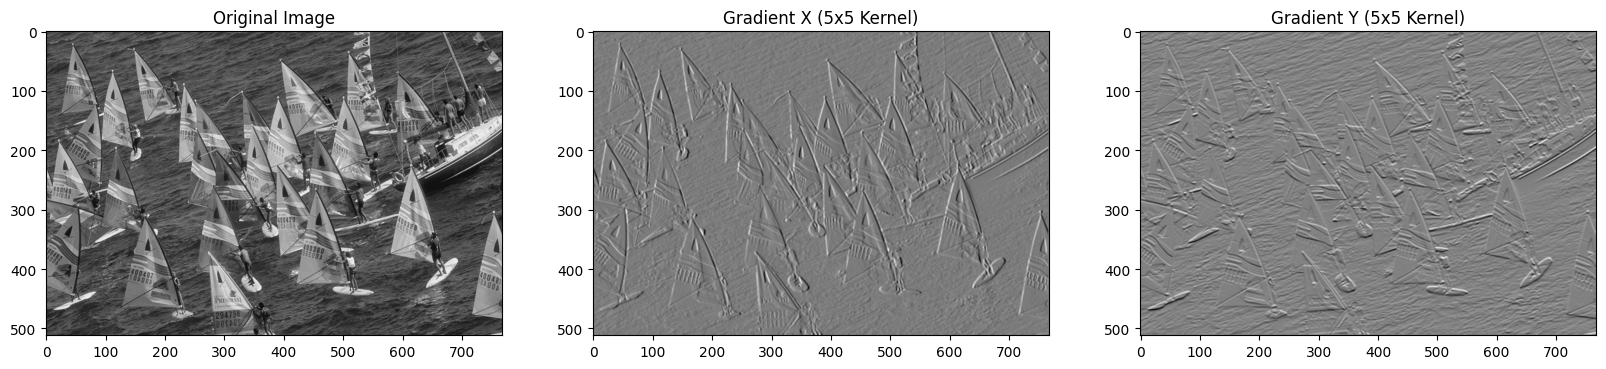

In [10]:
# 定义5x5的Sobel滤波器
sobel_x_5x5 = np.array([[-1, -2, 0, 2, 1],
                        [-4, -8, 0, 8, 4],
                        [-6, -12, 0, 12, 6],
                        [-4, -8, 0, 8, 4],
                        [-1, -2, 0, 2, 1]])

sobel_y_5x5 = np.array([[-1, -4, -6, -4, -1],
                        [-2, -8, -12, -8, -2],
                        [0, 0, 0, 0, 0],
                        [2, 8, 12, 8, 2],
                        [1, 4, 6, 4, 1]])

# 对图像进行卷积操作
gradient_x_5x5 = cv2.filter2D(image, cv2.CV_64F, sobel_x_5x5)
gradient_y_5x5 = cv2.filter2D(image, cv2.CV_64F, sobel_y_5x5)

# 可视化结果
plt.figure(figsize=(20, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(gradient_x_5x5, cmap='gray'), plt.title('Gradient X (5x5 Kernel)')
plt.subplot(133), plt.imshow(gradient_y_5x5, cmap='gray'), plt.title('Gradient Y (5x5 Kernel)')
plt.show()